# HathiTrust Research Center (HTRC)

The [HathiTrust Digital Library](https://www.hathitrust.org/) contains over 14 million volumes scanned from academic libraries around the world (primarily in North America). The [HathiTrust Research Center](https://analytics.hathitrust.org/) allows researchers to access almost all of those texts in a few different modes for computational text analysis. 

This notebook will walk us through getting set-up to analyze [HTRC Extracted Features](https://wiki.htrc.illinois.edu/display/COM/Extracted+Features+Dataset) for volumes in HathiTrust in a Jupyter/Python environment. *Extracted Features* offer a highly robust access point for in-copyright works from the HT Library for computational analysis. 

For more information on HTRC see [Programming Historian's Text Mining in Python through the HTRC Feature Reader](http://programminghistorian.org/lessons/text-mining-with-extracted-features)

## Installation

To start let's install a few helpful tools, starting with the *HTRC Feature Reader* to work with Extracted Features: 

In [12]:
# you can pip install from the shell, or use sys to execute pip install within jupyter
import sys
!{sys.executable} -m pip install htrc-feature-reader

You should consider upgrading via the 'pip install --upgrade pip' command.


In [20]:
from htrc_features import FeatureReader
import pandas as pd
import glob
%matplotlib inline

## Downloading Extracted Freatures from HathiTrust

Let's use the [HTRC Workset Builder](https://solr2.htrc.illinois.edu/solr-ef/) to find and download the extracted features for a single volume to start. 

### Single book
I searched for the author *Louise Erdrich* in the workset builder and found her book, *Love Medicine* in the search results. You can select the "Download Extracted Features" link under a search result to download a JSON file for the book's full features.

![Selecting Love Medicine from the Workset Builder](img/erdrich_2.png)

It's slightly more complicated to work with multiple volumes from HTRC. See the bottom of this notebook for instructions on how to do so.

### Working with Extracted Features
The content for each volume is stored in a compressed JSON file. In the example below, I downloaded the JSON file for *Love Medicine* into the same directory as this Jupyter notebook. Make sure you use the correct path below to point to your JSON file.

In [21]:
#if you're using a single book point to the .json file
volumes = glob.glob('*.json')

In [28]:
import os
paths = [os.path.join('erdrich/', 'inu'), os.path.join('', 'htrc-metadata-export-2.json')]
fr = FeatureReader(paths, compressed=False)
for vol in fr.volumes():
    print(vol.title)

TypeError: string indices must be integers

In [22]:
print(volumes)

['htrc-metadata-export.json', 'htrc-metadata-export-2.json']


We can now cycle through properties of the `FeatureReader()`. Since we're working with a single JSON file, instead of a zip of multiple volumes, we're going to pass the parameter `compressed=False`. The data and metadata we want to access will be stored in the `.volumes()` method of FeatureReader.

In [23]:
#if you're looking at the uncompressed JSON file for one book us the parameter 'compressed=False'
fr = FeatureReader(volumes, compressed=False)
for vol in fr.volumes():
    print(vol.id, '\n', vol.title, '\n', vol.author)
    print()

mdp.39015010832841 
 Love medicine : a novel / by Louise Erdrich. 
 ['Erdrich, Louise. ']

mdp.39015031818787 
 The bingo palace / Louise Erdrich. 
 ['Erdrich, Louise. ']



In [10]:
vol = fr.first()

In [11]:
vol

Let's try to pull out some more metadata about these titles, using the [Volume object](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Volume) in `FeatureReader`. We'll get the HT URL, year, and page count for each volume.

In [4]:
for vol in fr.volumes():
    print("URL: %s \nYear: %s \nPage count: %s " % (vol.handle_url, vol.year, vol.page_count))

URL: http://hdl.handle.net/2027/mdp.39015010832841 
Year: 1984 
Page count: 292 


The `source_institution` tells us where the volumes were scanned:

In [5]:
for vol in fr.volumes():
    print("Source institution: %s " % (vol.source_institution))

Source institution: MIU 


We can take a closer look at the first volume using `.first()`. In this case there's only one volume in our list. 

In [6]:
vol = fr.first()
vol.title

'Love medicine : a novel / by Louise Erdrich.'

### Tokens (features) from the book

The `tokens_per_page` method will give us the words in the volume:

In [7]:
tokens = vol.tokens_per_page()
tokens.head()

,count
page,
1,0
2,0
3,0
4,0
5,320


We can easily plot the number of tokens across every page of the book, which makes it easy to see where chapters begin and end.

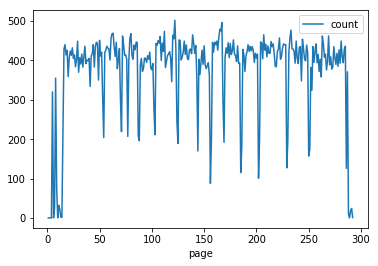

In [30]:
tokens.plot()

Now let's look at some specific pages, using the [Page object in FeatureReader](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html#htrc_features.feature_reader.Page). 

In [8]:
pages = [page for page in vol.pages()]

Then we'll index the 100th page.

In [32]:
page_100 = pages[99]

In [33]:
print("The body has %s lines, %s empty lines, and %s sentences" % (page_100.line_count(),
                                                                   page_100.empty_line_count(),
                                                                   page_100.sentence_count()))

The body has 33 lines, 0 empty lines, and 27 sentences


We can get a list of the tokens with the `tokenlist` method:

In [34]:
page_100.tokenlist().reset_index()

,page,section,token,pos,count
0,100,body,'d,MD,2
1,100,body,'s,POS,1
2,100,body,",",",",22
3,100,body,.,.,26
4,100,body,86,CD,1
5,100,body,Before,IN,1
6,100,body,Bev,NNP,1
7,100,body,Beverly,NNP,2
8,100,body,By,IN,1
9,100,body,Even,RB,1


We can do this for every page and get a huge table!

In [38]:
all_pages_meta = pd.concat([p.tokenlist().reset_index() for p in pages], sort=False)
all_pages_meta.head()

,index,page,section,token,pos,count
0,NaN,5,body,"""",'',13
1,NaN,5,body,"""",``,5
2,NaN,5,body,','',1
3,NaN,5,body,'promising,",",1
4,NaN,5,body,'s,POS,2


Let's see what the most common tokens are in the book.

In [79]:
token_count = all_pages_meta.groupby(['token']).count()[['count']]

In [92]:
token_count.sort_values(by='count', ascending=False)[0:20]

,count
that,509
,398
her,360
s,322
out,322
up,315
on,292
in,285
,276
the,276


Let's get a more accurate (and interesting) count by normalizing the text, removing stop words, and so on.

In [63]:
import string
punctuation = string.punctuation
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [93]:
token_count.index = [word.strip(string.punctuation).lower() for word in token_count.index]

## Working with multiple volumes

While it's pretty easy to work with a large corpus using FeatureReader, it takes a few extra steps to access the features for multiple volumes at once. 

1. If you don't already have an account with [HTRC Analytics](https://analytics.hathitrust.org), sign up for one there. 
2. Use the [HTRC Workset Builder](https://solr2.htrc.illinois.edu/solr-ef/) to select multiple volumes. I've selected a number of books by Louise Erdrich for the example below.
3. After selecting the search results you want, choose the *Add to Cart* button.
4. View your cart, and choose the *Export as Workset* button.
![Export your workset](img/workset.png)
5. This should take you to HTRC Analytics. Login, if you're not already, and add a title and description for your collection of texts.
6. Choose the *Download Extracted Features Helper* from the dropdown.
7. Enter a job name for your download, and Submit the form to generate your download.
8. Once the job has run, choose the job name, and select the button to *Click here to download EF_Rsync.sh*.
![Rsync download](img/rsync.png)

# Challenge

Try typing `vol.` and then tab to see everything that's provided in the volume object:

In [76]:
vol.

'2016-06-20T18:17:03.9782402Z'

Advanced: Can you figure out how to show the most common tokens for a single page?

Advanced: Can you remove punctuation and stop words from a page or full volume?